In [8]:
import os, config, itertools
import sherpa.astro.ui as shp

In [9]:
# configure plotting
%matplotlib inline
shp.set_ylog('data')

In [10]:
# configure fitting
shp.set_conf_opt('sigma', 1.6448536269514722) # 90% confidence interval
shp.set_stat('chi2xspecvar')
shp.set_xsabund('wilm')
shp.set_xsxsect('vern')

In [11]:
# define data of interest (ie the values you want to iterate over)
observations = ['30001002001', '30001002003', '30001002004', '30302006004', '30302006006', '30302007002', '30302007004']
regions = ['NE', 'SW']
modules = ['A', 'B']

In [46]:
# simple flux spectral analysis with sherpa
# for a native xspec analysis see the analysis of combined data

# Note that all of this code was initally written in smaller parts 
# but has been cleaned up and recombined for ease of understanding.
# Your code will look less polished as you are figuring out how to conduct an analysis,
# but it's good practice to reorganize your code when the analysis is complete.
output = []
for observation, module, region in list(itertools.product(observations, modules, regions)):
    stem = 'nu' + observation + module + region
    
    # load data
    phafile = config.PRODUCT_PATH + '/' + stem + '_sr_bin.pha'
    if not os.path.isfile(phafile): continue
    
    shp.load_pha(phafile) # load pha
    shp.subtract() # subtract background
    shp.ignore(':10.0,20.0:') # ignore  **-10.0 20.0-**
    
    # set up model
    shp.set_source(shp.xspowerlaw.therm)
    #shp.set_source(shp.xstbabs.absorption*shp.xsapec.plasma) # set model to tbasbs*apec
    # (for more info see http://cxc.cfa.harvard.edu/sherpa/ahelp/xstbabs.html 
    # and http://cxc.cfa.harvard.edu/sherpa/ahelp/xsapec.html)
    shp.reset() # reset parameter values from past iterations
    print(shp.get_source())
    
    # fit 
    shp.fit() # fit model
    fit = shp.get_fit_results()
    
    shp.conf() # calculate parameter confidence intervals
    conf = shp.get_conf_results()
    
    # calculate flux 90% CI from model
    # Note this works slightly differently from XSPEC but looks like it roughly gives similar results to cflux
    try:
        flux = shp.sample_flux(lo=10, hi=20, num=500, confidence=90, correlated=True)
    except: # catch flux calculation failure
        flux = [[None, None, None]]
    
    # print output
    # relevant values are collected then printed with a delimiter
    # data can then be copied and pasted into a spreadsheet for further analysis
    # this can also be rewritten to store data in some data structure for further analysis here in python
    output.append([stem])
    output[-1].append(fit.rstat)
    output[-1].append(flux[0][2]) # flux min
    output[-1].append(flux[0][0]) # flux val
    output[-1].append(flux[0][1]) # flux max
    for i in range(len(conf.parvals)):
        output[-1].append(conf.parmins[i])
        output[-1].append(conf.parvals[i])
        output[-1].append(conf.parmaxes[i])
     
        
for line in output:
    print(','.join(str(i) for i in line))

read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002001ANE_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002001ANE_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002001ANE_bk.pha
xspowerlaw.therm
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   therm.PhoIndex thawed      2.22451           -2            9           
   therm.norm   thawed   0.00097356            0        1e+24           
Dataset               = 1
Method                = levmar
Statistic             = chi2xspecvar
Initial fit statistic = 30.5986
Final fit statistic   = 18.7489 at function evaluation 13
Data points           = 25
Degrees of freedom    = 23
Probability [Q-value] = 0.715702
Reduced statistic     = 0.815167
Change in statistic   = 11.8498
   therm.PhoIndex   2.409

original model flux = 8.16688e-13, + 1.26735e-13, - 4.05659e-13
model component flux = 8.16688e-13, + 1.26735e-13, - 4.05659e-13
read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002003BSW_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002003BSW_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30001002003BSW_bk.pha
xspowerlaw.therm
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   therm.PhoIndex thawed      2.03917           -2            9           
   therm.norm   thawed  0.000931997            0        1e+24           
Dataset               = 1
Method                = levmar
Statistic             = chi2xspecvar
Initial fit statistic = 62.856
Final fit statistic   = 39.7727 at function evaluation 13
Data points           = 31
Degrees of freedom    

therm.PhoIndex upper bound:	0.899109
therm.norm lower bound:	-6.54911e-05
therm.norm upper bound:	0.000649081
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2xspecvar
confidence 1.64485-sigma (90%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   therm.PhoIndex      1.12868    -0.884191     0.899109
   therm.norm    7.24835e-05 -6.54911e-05  0.000649081
original model flux = 6.78373e-13, + 2.17815e-13, - 4.89163e-13
model component flux = 6.78373e-13, + 2.17815e-13, - 4.89163e-13
read ARF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302006006BNE_sr.arf
read RMF file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302006006BNE_sr.rmf
read background file /home/evan/GC_spectral_analysis/experiments/fluxconsistency/products/nu30302006006BNE_bk.pha
xspowerlaw.the

Dataset               = 1
Method                = levmar
Statistic             = chi2xspecvar
Initial fit statistic = 200.686
Final fit statistic   = 18.6949 at function evaluation 44
Data points           = 23
Degrees of freedom    = 21
Probability [Q-value] = 0.604707
Reduced statistic     = 0.890232
Change in statistic   = 181.991
   therm.PhoIndex   1.90762     
   therm.norm     0.000633301 
therm.PhoIndex lower bound:	-0.454196
therm.PhoIndex upper bound:	0.470073
therm.norm lower bound:	-0.00044051
therm.norm upper bound:	0.00148149
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2xspecvar
confidence 1.64485-sigma (90%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   therm.PhoIndex      1.90762    -0.454196     0.470073
   therm.norm    0.000633301  -0.00044051   0.00148149
original model flux = 8.06112e-13, 

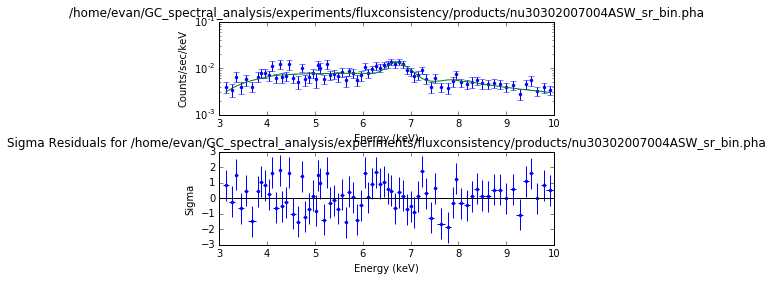

In [39]:
shp.plot('fit', 'delchi')